In [2]:
from tensorflow.keras.models import load_model
model = load_model('f:/data/dogs-vs-cats/cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [4]:
img_path = 'f:/data/dogs-vs-cats_small/test/cats/cat.1700.jpg'

from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) # 이미지를 4D 텐서로 변경한다
img_tensor /= 255.

print(img_tensor.shape) # 이미지 텐서의 크기는 (1, 150, 150, 3)

(1, 150, 150, 3)


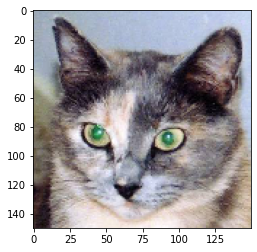

In [5]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [6]:
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers[:8]] # 상위 8개 층의 출력을 추출한다.
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [7]:
activations = activation_model.predict(img_tensor)

(1, 148, 148, 32)


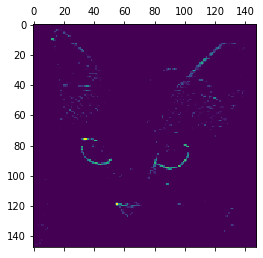

In [10]:
# 고양이 이미지에 대한 첫 번째 합성곱 층의 활성화 값
first_layer_activation = activations[0]
print(first_layer_activation.shape)
# (1, 148, 148, 32)

import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')

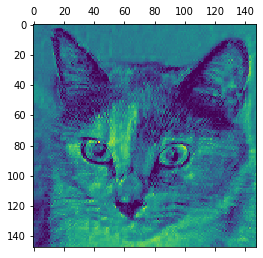

In [12]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')

In [ ]:
layer_names = []
for layer in model.laeyrs[:8]:
    layer_names.append(layer.name) # 층의 이름을 그래프 제목으로 사용한다.

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # 특성 맵을 그린다. 
        n_features = layer_activation.shape[-1] # 특성 맵에 있는 특성의 수
        
        size = layer_activation.shape[1] # 특성 맵의 크기는 (1, size, size, n_features)이다.
        
        n_cols = n_features // images_per_row # 활성화 채널을 위한 그리드 크기를 구한다.
        display_grid = np.zeors((size * n_cols, images_per_row * size))
        
        for col in range(n_cols): # 각 활성화를 하나의 큰 그리드에 채운다. 
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
        